In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


cyberdata=pd.read_csv("cybersecurity_attacks.csv")
cyberdata.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


### We select the nan categorical data with the target

In [4]:
nan_cols = cyberdata[["Malware Indicators", "Alerts/Warnings", "Firewall Logs", "IDS/IPS Alerts","Attack Type"]]
nan_cols

,Malware Indicators,Alerts/Warnings,Firewall Logs,IDS/IPS Alerts,Attack Type
0,IoC Detected,NaN,Log Data,NaN,Malware
1,IoC Detected,NaN,Log Data,NaN,Malware
2,IoC Detected,Alert Triggered,Log Data,Alert Data,DDoS
3,NaN,Alert Triggered,NaN,Alert Data,Malware
4,NaN,Alert Triggered,NaN,Alert Data,DDoS
...,...,...,...,...,...
39995,IoC Detected,NaN,Log Data,Alert Data,DDoS
39996,IoC Detected,NaN,Log Data,NaN,DDoS
39997,IoC Detected,NaN,Log Data,Alert Data,DDoS
39998,IoC Detected,Alert Triggered,Log Data,NaN,Malware


In [6]:
nbvariable_nan = cyberdata[["Malware Indicators", "Alerts/Warnings",  "Firewall Logs", "IDS/IPS Alerts"]].nunique()
print(nbvariable_nan)

Malware Indicators    1
Alerts/Warnings       1
Firewall Logs         1
IDS/IPS Alerts        1
dtype: int64


### Malware Indicators by Attack Type

Attack types associated with 'IoC Detected':
Attack Type
Malware      6681
Intrusion    6665
DDoS         6654
Name: count, dtype: int64


Text(0, 0.5, 'Number of Occurrences')

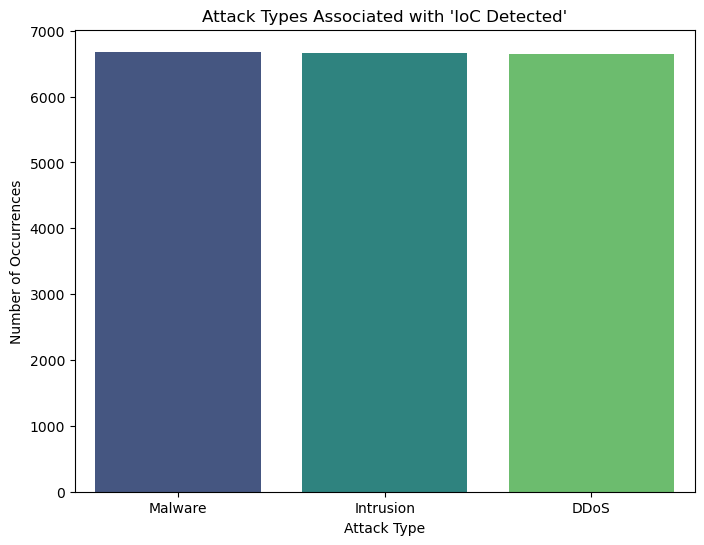

In [15]:
ioc_detected = nan_cols[nan_cols["Malware Indicators"] == "IoC Detected"]
attack_type_counts = ioc_detected["Attack Type"].value_counts()

print("Attack types associated with 'IoC Detected':")
print(attack_type_counts)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=attack_type_counts.index, y=attack_type_counts.values, hue=attack_type_counts.index, palette="viridis", legend=False)
plt.title("Attack Types Associated with 'IoC Detected'")
plt.xlabel("Attack Type")
plt.ylabel("Number of Occurrences")



### Bilan 1/ 

We can see here that, despite the 20,000 NaN values, the dataset is perfectly designed to mislead us

### Alerts/Warnings by Attack Type

Attack types associated with 'Alert Triggered':
Attack Type
Malware      6735
DDoS         6673
Intrusion    6525
Name: count, dtype: int64


Text(0, 0.5, 'Number of Occurrences')

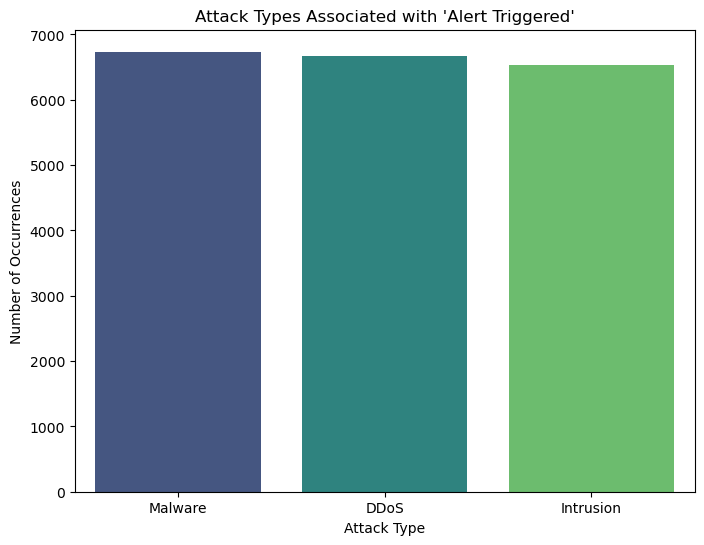

In [20]:
alert_triggered = nan_cols[nan_cols["Alerts/Warnings"] == "Alert Triggered"]
attack_type_counts = ioc_detected["Attack Type"].value_counts()

print("Attack types associated with 'Alert Triggered':")
print(attack_type_counts)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=attack_type_counts.index, y=attack_type_counts.values, hue=attack_type_counts.index, palette="viridis", legend=False)
plt.title("Attack Types Associated with 'Alert Triggered'")
plt.xlabel("Attack Type")
plt.ylabel("Number of Occurrences")



## Bilan 2/
We can see here that, despite the 20,000 NaN values, the dataset is perfectly designed to mislead us.



### Firewall Logs by Attack Type

Attack types associated with 'Log Data':
Attack Type
DDoS         6712
Malware      6704
Intrusion    6623
Name: count, dtype: int64


Text(0, 0.5, 'Number of Occurrences')

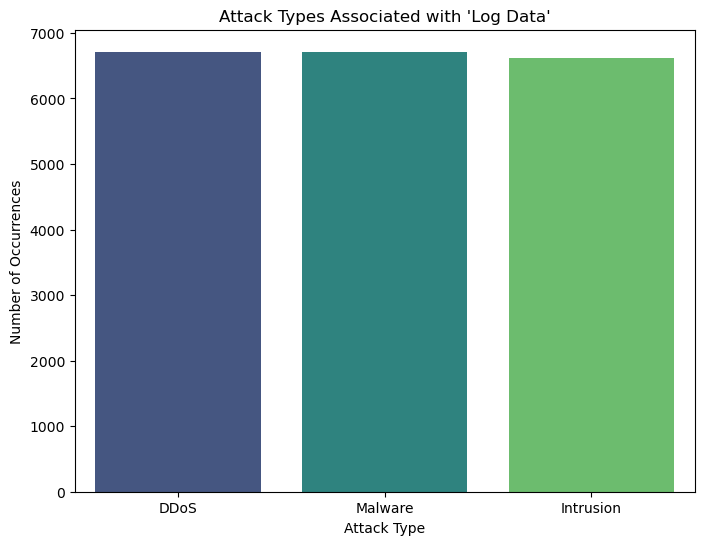

In [31]:
log_data = nan_cols[nan_cols["Firewall Logs"] == "Log Data"]
attack_type_counts = log_data["Attack Type"].value_counts()

print("Attack types associated with 'Log Data':")
print(attack_type_counts)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=attack_type_counts.index, y=attack_type_counts.values, hue=attack_type_counts.index, palette="viridis", legend=False)
plt.title("Attack Types Associated with 'Log Data'")
plt.xlabel("Attack Type")
plt.ylabel("Number of Occurrences")

## Bilan 3/
We can see here that, despite the 20,000 NaN values, the dataset is perfectly designed to mislead us.

### IDS/IPS Alerts by Attack Type

Attack types associated with 'Alert Data':
Attack Type
DDoS         6697
Malware      6666
Intrusion    6587
Name: count, dtype: int64


Text(0, 0.5, 'Number of Occurrences')

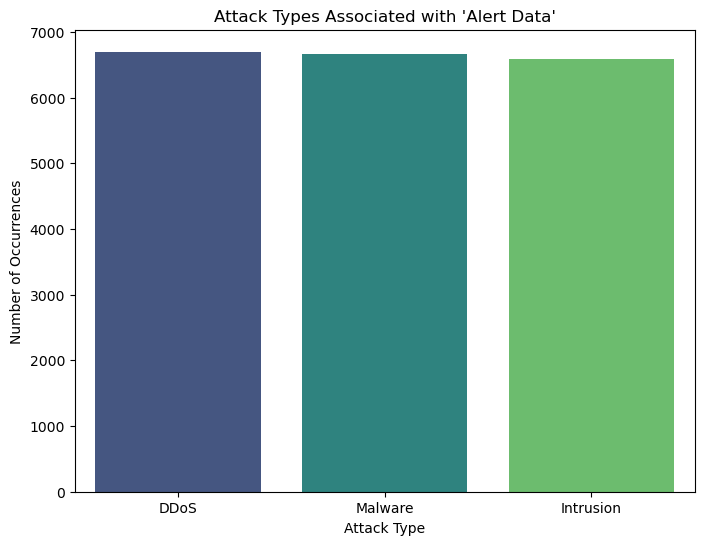

In [30]:
alert_data = nan_cols[nan_cols["IDS/IPS Alerts"] == "Alert Data"]
attack_type_counts = alert_data["Attack Type"].value_counts()

print("Attack types associated with 'Alert Data':")
print(attack_type_counts)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=attack_type_counts.index, y=attack_type_counts.values, hue=attack_type_counts.index, palette="viridis", legend=False)
plt.title("Attack Types Associated with 'Alert Data'")
plt.xlabel("Attack Type")
plt.ylabel("Number of Occurrences")

## Bilan 4/
We can see here that, despite the 20,000 NaN values, the dataset is perfectly designed to mislead us.

# Bilan

Since these values are not particularly useful and include 20,000 NaN entries, we will compare two datasets: one retaining these values and one excluding them.